# 간단한 이상 탐지 예제를 파이토치로 구현 이 예제에서는 One-class-SVM을 사용하여 데이터 이상을 탐지

In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

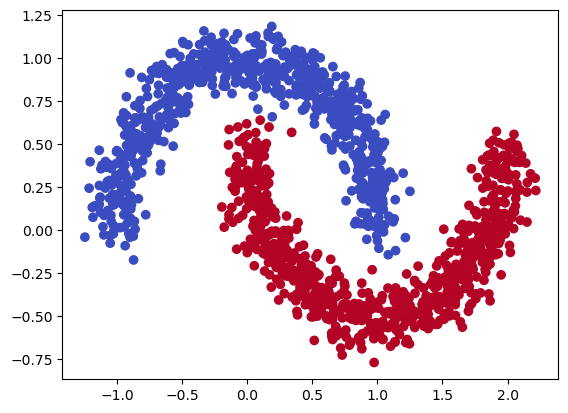

In [2]:
x, y = make_moons(n_samples=1500, noise=0.1, random_state=777)

# 데이터 시각화 
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.coolwarm)
plt.show()

### 이상 데이터 설정

In [3]:
outliers_ratio = 0.1                      #### 이상치 비율 
n_outliers = int(outliers_ratio * len(x))  ### 이상치 데이터 개수     
n_inliers = len(x) - n_outliers            ### 정상 데이터 개수 
  
rng = np.random.RandomState(777)           ### 난수 생성 객체 
x_outliers = 1.5 * rng.uniform(low=-1, high=3, size=(n_outliers, 2)) ### 이상치 데이터 생성 난수 생성을 이용해서 uniform 분포를 
# 따르는 값을 생성 -> 1.5배 해서 이상치 데이터를 생성
x = np.vstack([x, x_outliers])  # 이상치 데이터를 기존 데이터 추가 
y = np.hstack([y, -1 * np.ones(n_outliers)]) # 이상치 데이터의 클래스는 -1로 설정합니다.

In [4]:
# 데이터 정규화 
x = (x - x.mean(axis=0)) / x.std(axis=0)

# 학습 데이터 평가 데이터 분리 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=777)

# One-class SVM 모델 학습 
model = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
model.fit(x_train)

# 이상치 탐지 
y_pred = model.predict(x_test)
y_pred = np.where(y_pred == 1, 0, y_pred) # 1을 0으로 -1을 1로 변환 
score = f1_score(y_test, y_pred, average='macro')

"""
F1 score 는 정밀도 와 재현율의 조화 평균으로 계산 됩니다. 

정밀도 = TP / (TP + FP)
재현율 = TP / (TP + FN)

F1 score = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

FN : 거짓 음성 -> 실제는 양성인데 음성이라고 하는 경우 
TP : 참 양성 -> 실제 양성인데 양성이라고 하는 경우 
FP : 거짓 양성 - > 실제는 음성인데 양성이라고 하는 경우 

F1 스코어 : 0부터 1까지 값을 가지고 1에 가까우면 좋은 모델 
"""

print(f"F1 score >> " , score)

F1 score >>  0.385644087827331


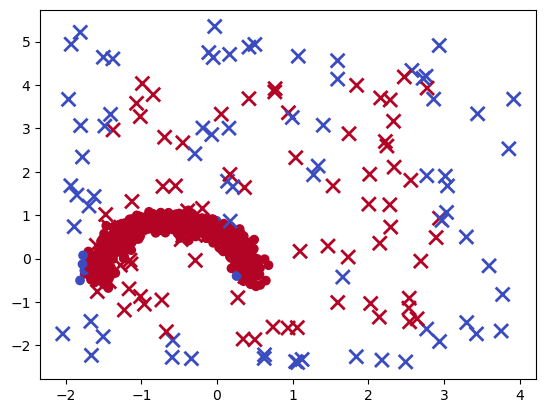

In [5]:
# 모든 데이터 포인트에 대한 예측 결과 얻기
y_pred_all = model.predict(x)

# 이상치 데이터와 정상 데이터를 분리하여 시각화
X_inliers = x[y == 0]
X_outliers = x[y == -1]
y_pred_inliers = y_pred_all[y == 0]
y_pred_outliers = y_pred_all[y == -1]

plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c=y_pred_inliers, cmap=plt.cm.coolwarm)
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=y_pred_outliers, cmap=plt.cm.coolwarm, marker='x', 
            s=100, linewidth=2)
plt.show()